# Simulations and Statistical Inference

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.2     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
options(repr.plot.width=4, repr.plot.height=3)

## Set random number seed for reproducibility

In [3]:
set.seed(42)

## Generating numbers

Using the `c` function

In [4]:
c(1,2,3,5,8,13)

[1]  1  2  3  5  8 13

Using the `:` operator

In [5]:
1:10

[1]  1  2  3  4  5  6  7  8  9 10

In [6]:
10:1

[1] 10  9  8  7  6  5  4  3  2  1

Using the `seq` function

In [7]:
seq(1, 10)

[1]  1  2  3  4  5  6  7  8  9 10

In [8]:
seq(1, 10, 2)

[1] 1 3 5 7 9

In [9]:
seq(10, 1, -1)

[1] 10  9  8  7  6  5  4  3  2  1

In [10]:
seq(0, 1, length.out = 11)

[1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

## Using `rep`

`rep` is useful for generating repeating data patterns.

In [11]:
rep(3, 5)

[1] 3 3 3 3 3

In [12]:
rep(1:3, times=5)

[1] 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3

In [13]:
rep(1:3, each=5)

[1] 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3

In [14]:
rep(1:3, length.out=10)

[1] 1 2 3 1 2 3 1 2 3 1

## Using `sample`

Simulate `n` tooses of a coin

In [15]:
n <- 10

In [16]:
t1 <- sample(c('H', 'T'), n, replace = TRUE)
t1

[1] "H" "H" "H" "H" "T" "T" "T" "T" "H" "T"

In [17]:
table(t1)

t1
H T 
5 5 

Simulate `n` tosses of a biased coin

In [18]:
t2 <- sample(c('H', 'T'), n, replace = TRUE, prob = c(0.3, 0.7))
t2

[1] "T" "H" "H" "T" "T" "H" "H" "T" "T" "T"

In [19]:
table(t2)

t2
H T 
4 6 

Simulate `n` rolls of a 6-sided die

In [20]:
n <- 100

In [21]:
d1 <- sample(1:6, n, replace=TRUE)
d1

[1] 3 1 1 3 4 5 5 5 4 2 4 3 2 1 2 6 3 6 2 4 4 6 2 5 4 5 4 2 2 3 1 5 2 2 6 6 2
 [38] 4 3 6 5 2 6 2 2 5 1 1 4 5 2 1 5 4 4 1 3 3 5 5 4 6 5 4 6 2 2 1 2 5 6 5 4 1
 [75] 4 2 2 3 5 5 6 3 6 4 5 1 4 1 1 5 6 3 1 2 5 6 1 5 6 5

In [22]:
table(d1)

d1
 1  2  3  4  5  6 
15 20 11 17 22 15 

Sampling without replacement. For example, if we wanted to assiggn 16 samples to treatment A or B at random such that exactly half had each treatment.

In [23]:
sample(rep(c('A', 'B'), each=8))

[1] "B" "A" "B" "B" "B" "B" "A" "A" "A" "B" "A" "B" "B" "A" "A" "A"

## Random number generators

### Discrete distributions

Sampling from a Bernoullli distribution returns TRUE for success and FALSE for failure.

In [24]:
rbernoulli(n=10, p=0.5)

[1]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE

In [25]:
as.integer(rbernoulli(n=10, p=0.5))

[1] 0 0 0 0 0 1 1 1 1 1

Sampling from a Binomial distribution returns the number of **successes** in `size` trials for `n` experiments.

In [26]:
rbinom(n=10, p=0.5, size=5)

[1] 2 0 1 3 4 3 3 2 3 1

Sampling from a negative binomial distribution returns the number of **failures** until `size` succcesses are observed for `n` experiemnts.

In [26]:
rnbinom(n=10, size=5, prob=0.5)

[1]  5 10  5  1  0  9  4  2  4  6

Sampling from a Poisson distribution returns the number of **successes** in `n` experiments if the average success rate per experiment is `lambda`.

In [27]:
rpois(n=10, lambda = 3)

[1] 3 2 3 5 3 1 3 6 2 5

**Note**:  We can give different parameters for each experiment in these distributions.

In [28]:
rpois(n=10, lambda=1:10)

[1]  0  1  0  3  4  4  6  3 18 12

### Continuous distributions

Sampling from a standard uniform distribution.

In [31]:
runif(5)

[1] 0.1495790 0.4992729 0.9405649 0.3342313 0.1884343

Sampling form a uniform distribution, with values between 90 and 100.

In [32]:
runif(5, 90, 100)

[1] 92.69716 95.30744 90.21450 97.98760 91.10335

Sampling from a standard normal distribution.

In [33]:
rnorm(5)

[1]  0.09992556  0.30272834 -1.15864442  1.60487336 -1.10200153

## Looping

In [34]:
for (i in 1:10) {
    print(mean(rnorm(10)))
}

[1] -0.1410044
[1] -0.5669993
[1] 0.4107608
[1] -0.5903525
[1] 0.4412251
[1] 0.09644882
[1] -0.1793807
[1] -0.255553
[1] -0.2180691
[1] -0.2066974


Saving variables generated in a loop

In [35]:
n <- 10
vars <- numeric(n)
for (i in 1:n) {
    vars[i] <- mean(rnorm(10))
}
vars

[1] -0.014201709 -0.464128997 -0.148753622 -0.007351464 -0.730132438
 [6] -0.382615529  0.496025572  0.026401187 -0.020711359  0.438379476

In [38]:
lapply(1:10,FUN = rnorm)

[[1]]
[1] 1.282856

[[2]]
[1] 1.6637802 0.4014363

[[3]]
[1] -1.5093425 -1.1383659  0.3377412

[[4]]
[1] -1.4726281 -0.2918773 -2.0296453 -0.5940445

[[5]]
[1] -1.05455070 -1.07847962  1.28112324  0.08102826 -0.99307899

[[6]]
[1] -0.757071531  0.009243516  1.409326940  0.293275146  0.297134826
[6] -1.402530360

[[7]]
[1]  0.1042851  0.3714197 -1.6761574  1.7846715 -2.2769847 -1.5898211 -0.2463743

[[8]]
[1] -0.3537499  0.2683726  0.4541753 -2.6882473  0.8666502  0.1687397 -1.0908241
[8] -0.3803481

[[9]]
[1] -0.9480918  0.7212523 -0.1591425 -1.7875566  1.4937785  1.5238957  0.4586641
[8] -0.8124965  1.0553833

[[10]]
 [1] -0.90759505 -0.41715211  1.12843785  0.93361285  0.44560385 -0.05912985
 [7]  0.18870847  0.69126958  0.82185628 -0.97625602

In [39]:
lapply(1:10, FUN = function(x) mean(rnorm(x)))

[[1]]
[1] -1.295101

[[2]]
[1] 0.3673208

[[3]]
[1] -0.1447151

[[4]]
[1] -0.4894762

[[5]]
[1] -0.05616309

[[6]]
[1] 0.1285093

[[7]]
[1] 0.3089688

[[8]]
[1] -0.002152758

[[9]]
[1] 0.05806114

[[10]]
[1] -0.4509346

## Using `replicate`

`replicate` is like `rep` but works for a function (such as a random number generator)

In [32]:
replicate(3, rnorm(5))

-0.9984839,0.15461594,-0.88368060
-2.1072414,-0.80160087,0.07714041
0.8574190,-0.04518119,0.83720136
1.1260757,-1.03824075,0.09992556
-0.1983684,1.55953311,0.30272834


`replicate` is quite useful for simulations. For example, suppose we want to know the distribution of the sample mean  if we sampled 100 numbers from the standard normal distribution 1,000 times.

In [40]:
n_expts <- 1000
n <- 100

### Using for loop

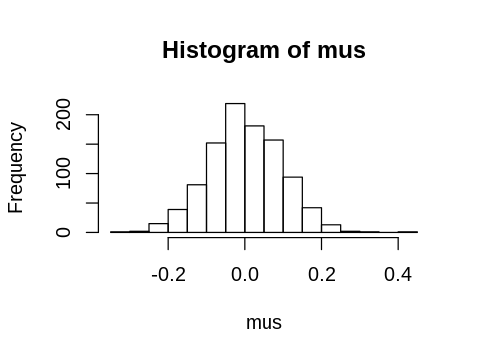

In [41]:
set.seed(123)
mus <- numeric(n_expts)
for (i in 1:n_expts) {
    mus[i] <- mean(rnorm(n))
}
hist(mus)

### Using replicate

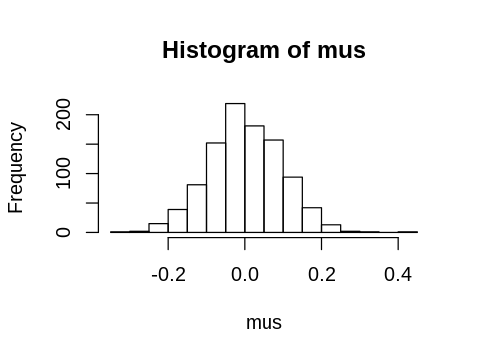

In [42]:
set.seed(123)
mus <- replicate(n_expts, mean(rnorm(n)))
hist(mus)

## Making a `data.frame`  or `tibble` of simulated data

Let's simulate the following experiment. 

- There are 10 subjects in Group A and 10 subjects in Group B with random PIDs from 10000-99999
- We measure 5 genes in each subject. The genes have the same distribution for each subject, but different genes have different distribtutions:
    - gene1 $\sim N(10, 1)$
    - gene2 $\sim N(11, 2)$
    - gene3 $\sim N(12, 3)$
    - gene4 $\sim N(13, 4)$
    - gene5 $\sim (N(14, 5)$
    
NB: This is for illustration purposes! Our gene counts (even if 'normalized') are not normally distributed!

In [43]:
replicate(5, rnorm(3, 1:5, 1))

1.264993,0.9467906,1.076689,-1.503406,1.069951
3.830747,2.4379042,2.455073,1.404136,3.169101
2.940622,4.3374490,3.873871,2.264472,1.632268


In [44]:
n <- 10
n_genes <- 5
min_pid <- 10000
max_pid <- 99999
groupings <- c('A', 'B')
n_groups <- length(groupings)
gene_mus <- 10:14
gene_sigmas <- 1:5
pad_width <- 3

In [45]:
pids <- sample(min_pid:max_pid, n_groups*n)
groups <- sample(rep(groupings, each=n))
genes <- t(replicate(n_groups*n, rnorm(n_genes, gene_mus, gene_sigmas)))
gene_names <- paste('gene', str_pad(1:n_genes, width = pad_width, pad='0'), sep='')
colnames(genes) <- gene_names

In [48]:
df <- tibble(
    pid = pids,
    grp = groups,
    genes
)

In [49]:
sample_n(df, 3)

pid,grp,genes
<int>,<chr>,"<dbl[,5]>"
49294,B,"10.09916, 11.13709, 13.759675, 7.570842, 13.87096"
26965,A,"10.25517, 12.14361, 9.947208, 9.480991, 17.92670"
53191,B,"10.11352, 12.14002, 5.118997, 13.185731, 12.12351"


### Breakdown of simulation

Set up simulation configration parameters.

In [50]:
n <- 10
n_genes <- 5
min_pid <- 10000
max_pid <- 99999
groupings <- c('A', 'B')
n_groups <- length(groupings)
gene_mus <- 10:14
gene_sigmas <- 1:5
pad_width <- 3

Create unique PIDs for each subject

In [51]:
pids <- sample(min_pid:max_pid, n_groups*n)

Assign a group to each subject at random

In [52]:
groups <- sample(rep(groupings, each=n))

Make up 5 genes from different distributions for each subject

In [53]:
genes <- t(replicate(n_groups*n, rnorm(n_genes, gene_mus, gene_sigmas)))

Make nice names for each gene

In [54]:
gene_names <- paste('gene', str_pad(1:n_genes, width = pad_width, pad='0'), sep='')

Assign names to gene columns

In [55]:
colnames(genes) <- gene_names

Create `tibble` to store simulated data

In [56]:
df <- tibble(
    pid = pids,
    grp = groups,
    genes
)

Peek into `tibble`

In [57]:
sample_n(df, 3)

pid,grp,genes
<int>,<chr>,"<dbl[,5]>"
55227,B,"8.510962, 8.346383, 15.730738, 14.985960, 6.310063"
83617,B,"10.631235, 9.327966, 11.848167, 7.328592, 6.266653"
36196,A,"9.175094, 12.733087, 8.621942, 10.099226, 12.858999"
